# install packages

In [22]:
%pip uninstall ezpackage -y
%pip install git+https://github.com/ezg/ezpackage.git --upgrade


Found existing installation: ezpackage 0.1.0
Uninstalling ezpackage-0.1.0:
  Successfully uninstalled ezpackage-0.1.0
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/ezg/ezpackage.git to /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-ist6s322
  Running command git clone --filter=blob:none --quiet https://github.com/ezg/ezpackage.git /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-ist6s322
  Resolved https://github.com/ezg/ezpackage.git to commit 5e057f0b8b4d9a0d201861db50b114092a4c39a6
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for ezpackage, since package 'wheel' is not installed.
  Running setup.py install for ezpackage ... done

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# data cleaning

In [29]:
import pandas as pd
df = pd.read_csv("tracks.csv")
df = df[df["EVENT"] != "error"]

In [ ]:
# setup groups


In [44]:
import ezpackage

g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1


sub = df[df["EVENT"] == "onboarding_modal_closed"]
group = df.groupby('USER_ID')["EVENT"].count().reset_index(name ='EVENT_COUNT')
print(group)
g1 = set(group[(group['EVENT_COUNT'] > 10)]['USER_ID'])
g2 = set(group['USER_ID']) - g1

g1 = set(df[(df['EVENT'] == 'asset-shared') | (
    df['EVENT'] == 'asset_shared')]['USER_ID'])
g2 = set(df['USER_ID']) - g1


user_col = 'USER_ID'
event_col = 'EVENT'

groups = ezpackage.funnel.funnel(data=df, targets=[
    'account_created',  'operator_created'], event_col=event_col, index_col=user_col, groups=(g1, g2),
    group_names=('mobile', 'non-mobile'))

#groups = ezpackage.funnel.funnel(data=df, targets=[
#    'dataset_created',  'operator_created'], event_col=event_col, index_col=user_col, groups=(g1, g2),
#    group_names=('mobile', 'non-mobile'))

print(groups)
fig = ezpackage.funnel.plot(groups)
fig.show()

                                   USER_ID  EVENT_COUNT
0     005fd4f7-7833-4aa7-8c5c-8b843e935dea            1
1     006366c0-5c56-443f-8423-4a2dc9bc0523            2
2     0107443f-4fc1-4cc3-a55c-260bda311464           19
3     0141c09b-e832-482d-8086-5c640efaea2d            3
4     015b400d-65b0-4550-b125-32dfa1b29cc9            1
...                                    ...          ...
1596  ff3ae3f9-9d5c-4c74-bc86-d1b6162c67a9            3
1597  ff90ffe0-37c6-4ef2-a5c8-49c0e7c70908            1
1598  ffa3352f-98fb-4fbb-93a2-d8984c87b170            1
1599  ffdfc51a-328b-4d40-b2da-2f0ad8c6bb1f           10
1600  ffede06b-c0de-4830-b18e-9227f961f754            1

[1601 rows x 2 columns]


asdd


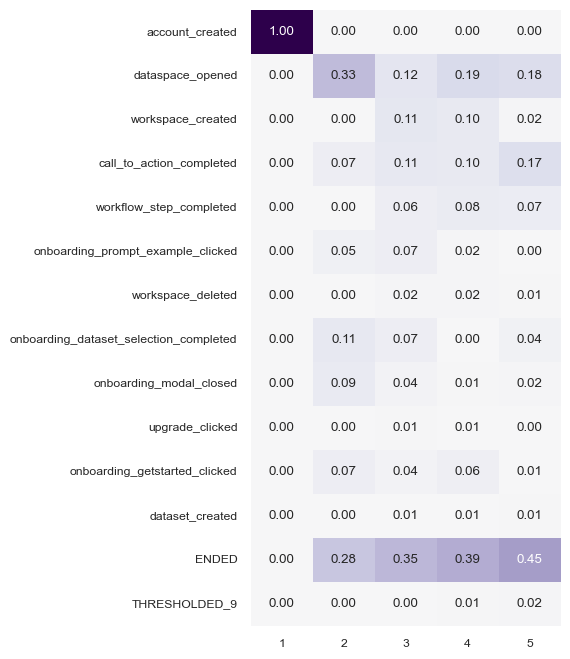

In [20]:
import matplotlib.pyplot as plt

df.sort_values(by='TIMESTAMP')
df = df[df["EVENT"] != "operator_created"]
g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1


user_col = 'USER_ID'
event_col = 'EVENT'
time_col = 'TIMESTAMP'

groups = ezpackage.matrix.matrix(
    df, max_steps=5, event_col=event_col, index_col=user_col, time_col=time_col, thresh=0.01)

plt.savefig("dd.svg")